![insomnia](insomnia.jpg)


Your client, SleepInc, has shared anonymized sleep data from their hot new sleep tracking app SleepScope. As their data science consultant, your mission is to analyze the lifestyle survey data with Python to discover relationships between exercise, gender, occupation, and sleep quality. See if you can identify patterns leading to insights on sleep quality.

## 💾 The data: sleep_health_data.csv

SleepInc has provided you with an anonymized dataset of sleep and lifestyle metrics for 374 individuals. This dataset contains average values for each person calculated over the past six months. The data is saved as `sleep_health_data.csv`.

The dataset includes 13 columns covering sleep duration, quality, disorders, exercise, stress, diet, demographics, and other factors related to sleep health. 

| Column | Description |
|---------|----------------------------------------|  
| `Person ID` | An identifier for each individual. |
| `Gender` | The gender of the person (Male/Female). |  
| `Age` | The age of the person in years. |
| `Occupation` | The occupation or profession of the person. |
| `Sleep Duration (hours)` | The average number of hours the person sleeps per day. |
| `Quality of Sleep (scale: 1-10)` | A subjective rating of the quality of sleep, ranging from 1 to 10. |
| `Physical Activity Level (minutes/day)` | The average number of minutes the person engages in physical activity daily. |  
| `Stress Level (scale: 1-10)` | A subjective rating of the stress level experienced by the person, ranging from 1 to 10. |
| `BMI Category` | The BMI category of the person (e.g., Underweight, Normal, Overweight). |
| `Blood Pressure (systolic/diastolic)` | The average blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. |
| `Heart Rate (bpm)` | The average resting heart rate of the person in beats per minute. |
| `Daily Steps` | The average number of steps the person takes per day. |
| `Sleep Disorder` | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea). |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the data
sleep = pd.read_csv("sleep_health_data.csv", index_col=0)

# display the first few rows
sleep.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
# get the number of rows and columns in the dataset
sleep.shape

(374, 12)

In [4]:
# check data types and non-null counts
sleep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


In [5]:
# check missing values in each column
sleep.isnull().sum()

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [6]:
# get summary statistics for numerical columns
sleep.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


### Which occupation has the lowest average sleep duration?

In [7]:
# check the number of unique occupations 
sleep["Occupation"].nunique()

11

In [8]:
# check the unique types of occupations 
sleep["Occupation"].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [9]:
# calculate the average sleep duration grouped by occupation
sleep_by_occ = sleep.groupby("Occupation").agg({"Sleep Duration": "mean"})
sleep_by_occ 

,Sleep Duration
Occupation,
Accountant,7.113514
Doctor,6.970423
Engineer,7.987302
Lawyer,7.410638
Manager,6.900000
Nurse,7.063014
Sales Representative,5.900000
Salesperson,6.403125
Scientist,6.000000


In [10]:
# sort the average sleep duration by occupation in ascending order
sleep_duration_sorted = sleep_by_occ.sort_values(by="Sleep Duration")
sleep_duration_sorted

,Sleep Duration
Occupation,
Sales Representative,5.900000
Scientist,6.000000
Salesperson,6.403125
Teacher,6.690000
Software Engineer,6.750000
Manager,6.900000
Doctor,6.970423
Nurse,7.063014
Accountant,7.113514


In [11]:
# get the occupation with the lowest average sleep duration
lowest_sleep_occ = sleep_duration_sorted.index[0]
print(lowest_sleep_occ)

Sales Representative


### Which occupation had the lowest quality of on average? Did the occupation with the lowest sleep duration also have the lowest sleep quality? 

In [12]:
# calculate average sleep quality grouped by occupation
quality_by_occ = sleep.groupby("Occupation").agg({"Quality of Sleep": "mean"})
quality_by_occ 

,Quality of Sleep
Occupation,
Accountant,7.891892
Doctor,6.647887
Engineer,8.412698
Lawyer,7.893617
Manager,7.000000
Nurse,7.369863
Sales Representative,4.000000
Salesperson,6.000000
Scientist,5.000000


In [13]:
# sort the average sleep quality by occupation in ascending order
sleep_quality_sorted = quality_by_occ.sort_values(by="Quality of Sleep")
sleep_quality_sorted

,Quality of Sleep
Occupation,
Sales Representative,4.000000
Scientist,5.000000
Salesperson,6.000000
Software Engineer,6.500000
Doctor,6.647887
Teacher,6.975000
Manager,7.000000
Nurse,7.369863
Accountant,7.891892


In [14]:
# get the occupation with the lowest average sleep duration
lowest_sleep_quality_occ = sleep_quality_sorted.index[0]
print(lowest_sleep_quality_occ)

Sales Representative


In [15]:
# verify if the occupation with the lowest sleep duaration also has the lowest sleep quality
same_occ = lowest_sleep_occ == lowest_sleep_quality_occ
if same_occ:
    print("Yes - {} has both the lowest average sleep duration "
          "and the lowest average sleep quality.".format(lowest_sleep_occ))
else:
    print("No - {} has the lowest average sleep duration,"
          "while {} has the lowest average sleep quality.".format(lowest_sleep_occ, lowest_sleep_quality_occ))

Yes - Sales Representative has both the lowest average sleep duration and the lowest average sleep quality.


### Explore how BMI Category can affect sleep disorder rates. Find out what ratio of app users in each BMI Category have been diagnosed with Insomnia.

In [16]:
# check the unique BMI categories in the dataset
sleep["BMI Category"].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

In [17]:
# check the unique sleep disorder categories in the dataset
sleep["Sleep Disorder"].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [18]:
# get the BMI Category names as a list
bmi_categories = sleep["BMI Category"].unique().tolist()
print(bmi_categories)

['Overweight', 'Normal', 'Obese']


In [19]:
# create a dictionary to store insomnia ratio for each BMI category
bmi_insomnia_dict = {}

# interate over each BMI Category
for bmi in bmi_categories: 
    df_subset = sleep[sleep["BMI Category"] == bmi]

    # calculate the proporation of insomnia cases within this BMI category
    ratio = df_subset["Sleep Disorder"].value_counts(normalize=True)["Insomnia"]
    ratio = round(ratio, 2)
    
    bmi_insomnia_dict[bmi] = ratio

# sort the BMI categories by insomnia ratio in ascending order 
bmi_insomnia_ratios = dict(sorted(bmi_insomnia_dict.items(), key=lambda x: x[1]))

# display the insomnia ratios by BMI category
print("Insominia ratio by BMI category:")
for category, ratio in bmi_insomnia_ratios.items():
    print("{}: {}".format(category, ratio))

Insominia ratio by BMI category:
Obese: 0.4
Overweight: 0.5
Normal: 0.56


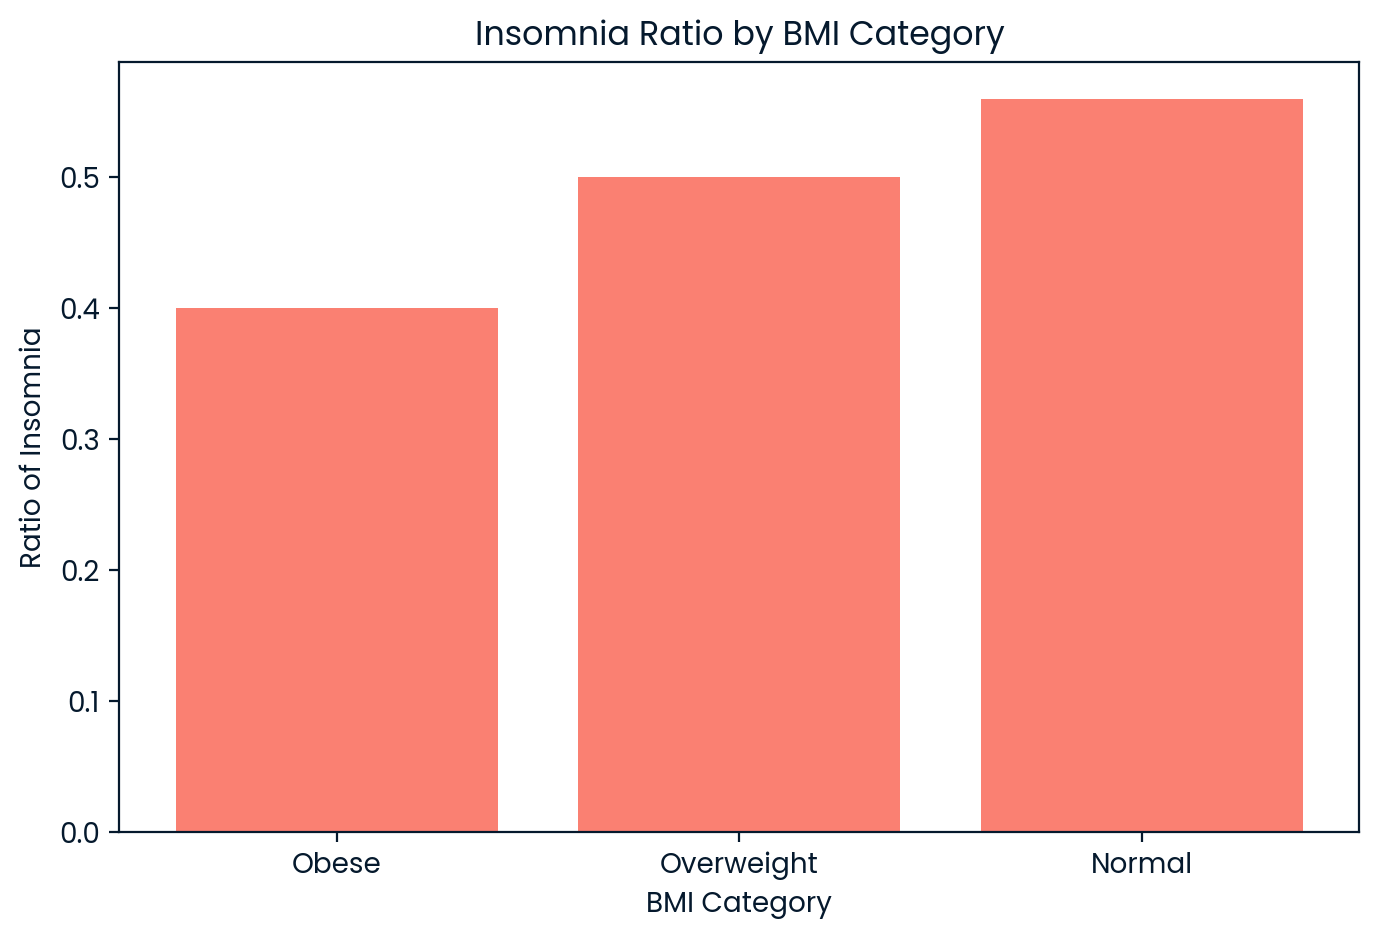

In [20]:
# plot the ratio of insomnia by BMI category
plt.figure(figsize=(8, 5))
plt.bar(bmi_insomnia_ratios.keys(), bmi_insomnia_ratios.values(), color="salmon")
plt.ylabel("Ratio of Insomnia")
plt.xlabel("BMI Category")
plt.title("Insomnia Ratio by BMI Category")
plt.show()